# Actividad Semanal 7 - Exploración de Datos y Visualización

![Logo Tec](img/LogoTec2.jpg)

## TC4029 Ciencia y analítica de datos (Gpo 10)
### Alumno: Armando Bringas Corpus (A01200230)
### Profesores: Dra. María de la Paz Rico Fernández, Mtra. Victoria Guerrero Orozco
### Fecha: 1 de noviembre de 2022

In [1]:
# Importación de librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context ='notebook', ticks =True, grid =False) 

In [3]:
# Mostrar todas las filas y columnas
#pd.set_option('display.rows', None)
pd.set_option('display.max_columns', None)

## Conjunto de los datos

A continuación, se muestra la base de datos requerida para realizar la actividad basada y su información general:

- Nombre del conjunto de datos: "Default of credit card clients Data Set".

- Descripción del conjunto de datos: Este conjunto de datos contiene información sobre pagos predeterminados, factores demográficos, datos crediticios, historial de pagos y estados de cuenta de clientes de tarjetas de crédito en Taiwán desde abril de 2005 hasta septiembre de 2005.

- Nombre de quién generó el conjunto de datos y su información general: Obtenido de ["UCI Machine Learning Repository"](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). Generado por:

Yeh, I. C., & Lien, C. H. (2009). [The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients](https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719). Expert Systems with Applications, 36(2), 2473-2480.

In [4]:
# Obtención de los datos y creación de dataframe
data_input = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(data_input)

# Mostrar los datos de los primeros cinco registros
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


## Información del Dataframe

In [5]:
# Nombres de las columnas
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [6]:
# Recodificación a datos categóricos de las columnas que aplica con base a la descripción del dataset
df['ID'] = df['ID'].astype('category')
df['X1'] = df['X1'].astype('float64')
df['X2'] = df['X2'].astype('category')
df['X3'] = df['X3'].astype('category')
df['X4'] = df['X4'].astype('category')
df['X6'] = df['X6'].astype('category')
df['X7'] = df['X7'].astype('category')
df['X8'] = df['X8'].astype('category')
df['X9'] = df['X9'].astype('category')
df['X10'] = df['X10'].astype('category')
df['X11'] = df['X11'].astype('category')
df['Y'] = df['Y'].astype('category')

In [7]:
# Tamaño del Dataframe
df.shape

(30000, 25)

In [8]:
# Tipos de datos del dataframe
df.dtypes

ID     category
X1      float64
X2     category
X3     category
X4     category
X5      float64
X6     category
X7     category
X8     category
X9     category
X10    category
X11    category
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17     float64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
Y      category
dtype: object

In [9]:
# Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   ID      30000 non-null  category
 1   X1      30000 non-null  float64 
 2   X2      29999 non-null  category
 3   X3      29998 non-null  category
 4   X4      29998 non-null  category
 5   X5      29995 non-null  float64 
 6   X6      29997 non-null  category
 7   X7      29995 non-null  category
 8   X8      29993 non-null  category
 9   X9      29991 non-null  category
 10  X10     29984 non-null  category
 11  X11     29986 non-null  category
 12  X12     29989 non-null  float64 
 13  X13     29989 non-null  float64 
 14  X14     29987 non-null  float64 
 15  X15     29985 non-null  float64 
 16  X16     29983 non-null  float64 
 17  X17     29990 non-null  float64 
 18  X18     29992 non-null  float64 
 19  X19     29991 non-null  float64 
 20  X20     29992 non-null  float64 
 21  X21     2998

## Registro y limpieza de datos nulos

In [10]:
# Detección de valores nulos en el Dataframe
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Conteo de los valores totales nulos en el Dataframe
df.isna().sum().sum()

196

In [12]:
# Conteno de los valores nulos por columna en el Dataframe
df.isnull().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [13]:
# Reemplazo por la media en aquellas columnas con datos categóricos donde hay algún valor nulo
df['X1'].fillna(df['X1'].mean(), inplace=True)
df['X5'].fillna(df['X5'].mean(), inplace=True)
df['X12'].fillna(df['X12'].mean(), inplace=True)
df['X13'].fillna(df['X13'].mean(), inplace=True)
df['X14'].fillna(df['X14'].mean(), inplace=True)
df['X15'].fillna(df['X15'].mean(), inplace=True)
df['X16'].fillna(df['X16'].mean(), inplace=True)
df['X17'].fillna(df['X17'].mean(), inplace=True)
df['X18'].fillna(df['X18'].mean(), inplace=True)
df['X19'].fillna(df['X19'].mean(), inplace=True)
df['X20'].fillna(df['X20'].mean(), inplace=True)
df['X21'].fillna(df['X21'].mean(), inplace=True)
df['X22'].fillna(df['X22'].mean(), inplace=True)
df['X23'].fillna(df['X23'].mean(), inplace=True)


In [14]:
# Remoción de datos nulos en registros con datos categóricos
df.dropna(subset=df.select_dtypes(include='category').columns, inplace=True)


In [15]:
# Corroborar que ya no hay datos nulos
df.isnull().values.any()

False

In [16]:
# Conteno de los valores nulos por columna en el Dataframe
df.isnull().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

## Estadística Descriptiva

### Datos Numéricos

Medidas de tendencia central y dispersión

In [17]:
# Descripción de los datos numéricos
df.describe()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29975.000000,29975.000000,29975.000000,29975.000000,2.997500e+04,29975.000000,29975.000000,29975.000000,29975.000000,2.997500e+04,29975.000000,29975.000000,29975.000000,29975.000000
mean,167538.604837,35.485486,51236.742214,49189.020075,4.702099e+04,43271.461939,40321.124569,38879.575122,5664.736681,5.924217e+03,5226.979483,4828.786706,4801.313658,5218.975931
std,129742.083982,9.217725,73658.424439,71195.996437,6.937082e+04,64351.721330,60813.193644,59570.099506,16568.559200,2.305012e+04,17613.216632,15672.229073,15283.914119,17784.448043
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3559.500000,2984.000000,2.663000e+03,2323.000000,1762.500000,1256.000000,1000.000000,8.340000e+02,390.000000,296.000000,251.000000,116.000000
50%,140000.000000,34.000000,22377.000000,21192.000000,2.008600e+04,19040.000000,18105.000000,17067.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67107.000000,64017.000000,6.017200e+04,54509.000000,50196.000000,49207.500000,5006.000000,5.000000e+03,4507.000000,4015.000000,4040.000000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


### Datos Categóricos

In [18]:
# Descripción de los datos categóricos
df.describe(include=['category'])

,ID,X2,X3,X4,X6,X7,X8,X9,X10,X11,Y
count,29975,29975.0,29975.0,29975.0,29975.0,29975.0,29975.0,29975.0,29975.0,29975.0,29975.0
unique,29975,2.0,7.0,4.0,11.0,11.0,11.0,11.0,10.0,10.0,2.0
top,1,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,1,18107.0,14015.0,15949.0,14726.0,15717.0,15749.0,16438.0,16932.0,16271.0,23345.0


## Conteo de Variables Categóricas y Escalamiento

### Total de Variables Categóricas

In [19]:
# Selección de variables categódicas
df.select_dtypes(include='category').columns

Index(['ID', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y'], dtype='object')

In [20]:
# Conteo de varibles categóricas
len(df.select_dtypes(include='category').columns)

11

In [21]:
# Separación de las variables de entrada 'X' y salida 'y'
X = df.drop(['ID','X2','X3','X4','X6','X7','X8','X9','X10','X11','Y'], axis=1)
y = df['Y']

### Normalización (escalamiento) de los Datos

In [22]:
# Normalización de los datos
scaled_data = preprocessing.scale(X)
scaled_data

array([[-1.13718742, -1.24604254, -0.64248634, ..., -0.30811617,
        -0.31414687, -0.29346219],
       [-0.36641463, -1.02906565, -0.6591989 , ..., -0.24430798,
        -0.31414687, -0.1810025 ],
       [-0.59764647, -0.1611581 , -0.29865028, ..., -0.24430798,
        -0.24871751, -0.01231298],
       ...,
       [-1.06011014,  0.16430723, -0.64721093, ..., -0.04012175,
        -0.18328815, -0.11914968],
       [-0.67472375,  0.59826101, -0.71794401, ..., -0.18522159,
         3.15125362, -0.19202355],
       [-0.90595558,  1.14070323, -0.04490725, ..., -0.24430798,
        -0.24871751, -0.23723234]])

## Modelo de PCA (Principal Component Analysis)

### Creación de modelo de PCA

In [23]:
# Creación de modelo de PCA utilizando la libría sklearn
pca = PCA(n_components=14)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data

array([[-1.95855484e+00, -5.36621367e-01,  1.33021045e+00, ...,
        -3.18539607e-03,  8.12241766e-03,  9.85136481e-03],
       [-1.73534420e+00, -2.17144734e-01,  8.63937210e-01, ...,
         1.22377857e-02, -4.08240854e-03,  7.20202245e-04],
       [-1.22442756e+00, -2.84990255e-01,  2.13278242e-01, ...,
        -8.04527187e-02, -4.13580328e-02, -5.71266513e-02],
       ...,
       [-1.28507287e+00,  1.46396343e-01,  2.50530938e-01, ...,
         3.48034500e-02,  1.29243107e-02, -1.21356784e-02],
       [ 8.30951478e-01,  2.42048023e+00,  3.63987778e-01, ...,
         1.71160366e-01, -1.40383644e-01, -8.31792205e-03],
       [-5.17200432e-01, -6.01012856e-01, -7.49384345e-01, ...,
        -1.75142671e-02,  1.15338745e-01, -4.69847738e-02]])

### Varianza de los datos explicada por cada componente seleccionado

In [24]:
# Por porcentaje de varianza por componente del modelo de PCA
per_var = np.round(pca.explained_variance_ratio_*100, decimals=4)
labels=['PC' + str(x) for x in range(1, len(per_var)+1)]

print("\n".join("{} : % {}".format(x, y) for x, y in zip(labels, per_var)))

PC1 : % 42.2796
PC2 : % 12.2575
PC3 : % 7.4646
PC4 : % 6.6068
PC5 : % 6.3118
PC6 : % 6.2334
PC7 : % 5.5682
PC8 : % 5.19
PC9 : % 5.0512
PC10 : % 1.8888
PC11 : % 0.5073
PC12 : % 0.2934
PC13 : % 0.1812
PC14 : % 0.166


#### Scree Plot para visualizar la varianza por componente

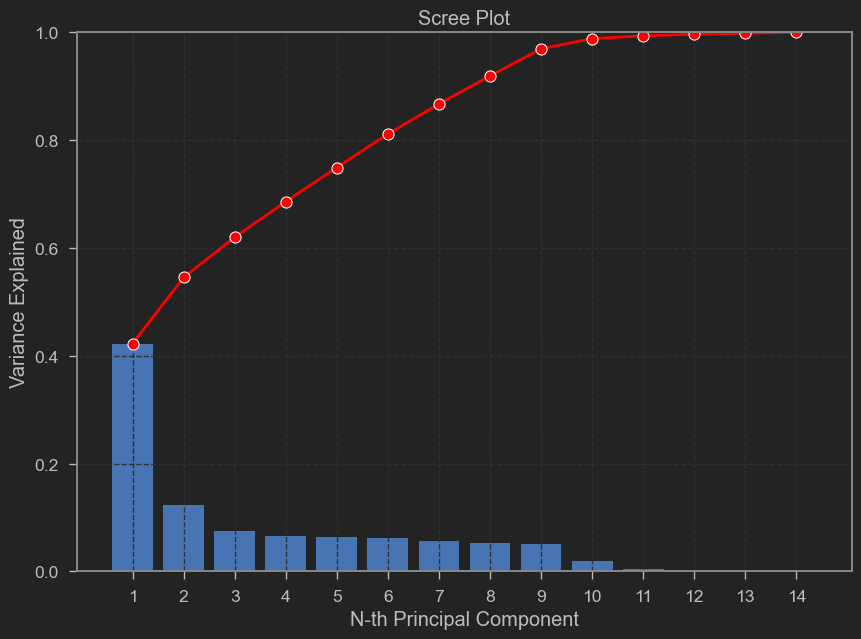

In [25]:
PC_components = np.arange(pca.n_components_) + 1

plt.subplots(figsize=(10, 7))



sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'red', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.grid(linestyle='--', linewidth=1)
plt.show()


#### Resumen de PCA

In [26]:
summary_pca_df = pd.DataFrame({'Standard_Deviation': np.sqrt(pca.explained_variance_),
                               'Proportion_of_Variance': pca.explained_variance_ratio_,
                               'Cumulative proportion' : np.cumsum(pca.explained_variance_ratio_)
                              })
summary_pca_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard_Deviation,2.432970,1.310000,1.022292,0.961764,0.940043,0.934190,0.882937,0.852423,0.840947,0.514242,0.266513,0.202685,0.159258,0.152462
Proportion_of_Variance,0.422796,0.122575,0.074646,0.066068,0.063118,0.062334,0.055682,0.051900,0.050512,0.018888,0.005073,0.002934,0.001812,0.001660
Cumulative proportion,0.422796,0.545371,0.620017,0.686085,0.749203,0.811538,0.867220,0.919120,0.969632,0.988521,0.993594,0.996528,0.998340,1.000000


Podemos observar que los componentes del PC1 al PC4 son los que más contribuyen con un 74.92 % de la varianza total asociada con las variables originales.

### Importancia de las variables en cada componente

In [27]:
pca_components_df = pd.DataFrame(pca.components_.transpose(), 
                                 columns = labels,
                                 index = X.columns
                                )

pca_components_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.165538,0.300757,-0.378519,-0.200385,0.034715,-0.078296,0.111171,-0.049318,-0.821850,-0.029185,-0.006167,0.015682,-0.000429,0.003345
X5,0.032749,0.071814,-0.869653,0.338606,-0.038970,0.071140,-0.078736,0.028493,0.330369,-0.009061,0.000125,-0.001307,0.000175,0.001085
X12,0.372421,-0.190873,-0.034248,-0.064019,0.041140,-0.044049,0.008164,0.009454,0.010315,0.566751,0.415900,-0.433059,-0.183850,-0.316518
X13,0.383241,-0.174665,-0.001819,0.007341,0.083053,-0.029012,-0.032332,-0.135660,0.017372,0.386839,0.038392,0.344905,0.329493,0.645312
X14,0.388254,-0.126921,0.034719,0.060474,0.114178,0.098797,-0.121311,0.092825,-0.018916,0.122845,-0.484533,0.495935,-0.085955,-0.527822
X15,0.391546,-0.120427,0.034021,0.074816,0.028600,0.014370,0.126419,0.039238,0.018952,-0.205276,-0.523292,-0.489054,-0.362857,0.346003
X16,0.388492,-0.105969,0.033862,0.039668,-0.106953,-0.099027,-0.007600,0.049750,0.023439,-0.420014,0.068039,-0.250218,0.718291,-0.226283
X17,0.380655,-0.094224,0.018549,-0.070256,-0.164912,0.069794,0.007969,0.000136,0.058719,-0.488832,0.513614,0.338870,-0.427303,0.072030
X18,0.135179,0.383268,0.173520,0.361305,0.226181,0.039799,-0.201060,-0.749027,0.022994,-0.056541,0.047621,-0.069337,-0.044910,-0.084590
X19,0.116800,0.408293,0.200768,0.346431,0.150606,0.407201,-0.279603,0.577785,-0.112656,0.050847,0.147240,-0.068916,0.038866,0.124932


In [28]:
for i in range(1,5):
    largest_var = pca_components_df['PC' + str(i)].nlargest(10)
    print(f'Para componente PC{i} las columnas de mayor varianza son \n{largest_var}\n')

Para componente PC1 las columnas de mayor varianza son 
X15    0.391546
X16    0.388492
X14    0.388254
X13    0.383241
X17    0.380655
X12    0.372421
X1     0.165538
X18    0.135179
X20    0.128098
X21    0.116932
Name: PC1, dtype: float64

Para componente PC2 las columnas de mayor varianza son 
X19    0.408293
X20    0.392267
X18    0.383268
X21    0.349526
X23    0.323459
X22    0.304077
X1     0.300757
X5     0.071814
X17   -0.094224
X16   -0.105969
Name: PC2, dtype: float64

Para componente PC3 las columnas de mayor varianza son 
X19    0.200768
X18    0.173520
X20    0.121992
X21    0.062207
X14    0.034719
X15    0.034021
X16    0.033862
X17    0.018549
X13   -0.001819
X12   -0.034248
Name: PC3, dtype: float64

Para componente PC4 las columnas de mayor varianza son 
X18    0.361305
X19    0.346431
X5     0.338606
X20    0.245326
X15    0.074816
X14    0.060474
X16    0.039668
X13    0.007341
X12   -0.064019
X17   -0.070256
Name: PC4, dtype: float64



### Histogramas de los atributos para la visualización de su distribución

Ya que los datos cuentan con outliers, para una mejor visualización de los histogramos los estamos removiendo con base a la siguiente referencia: 

Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 

In [29]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = np.array(points)[:, None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

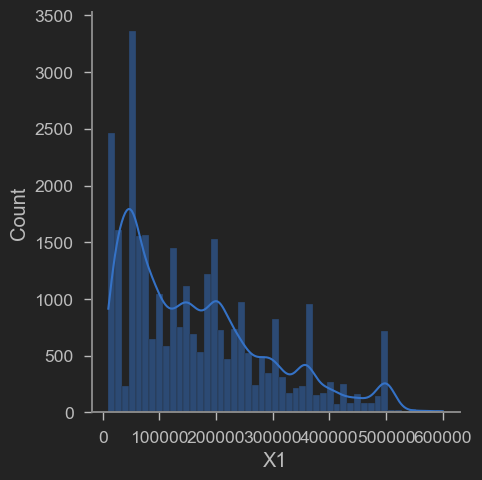

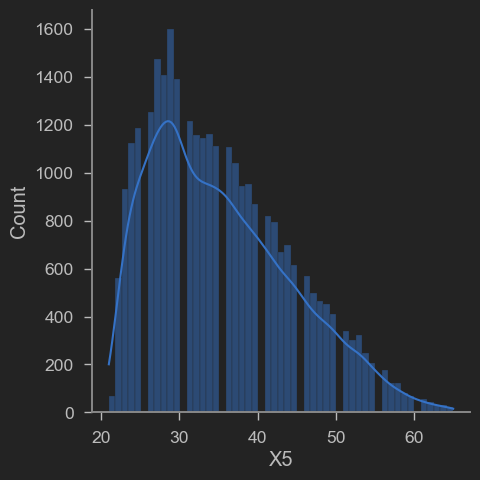

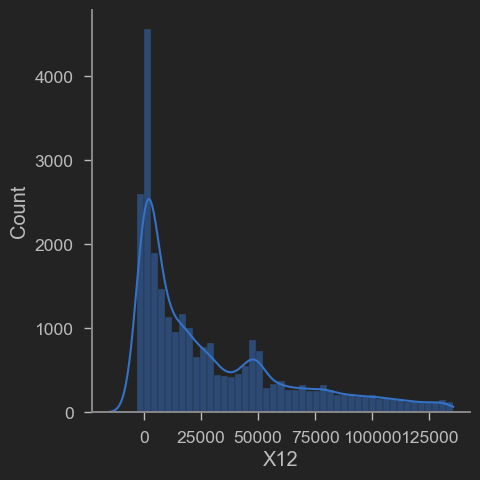

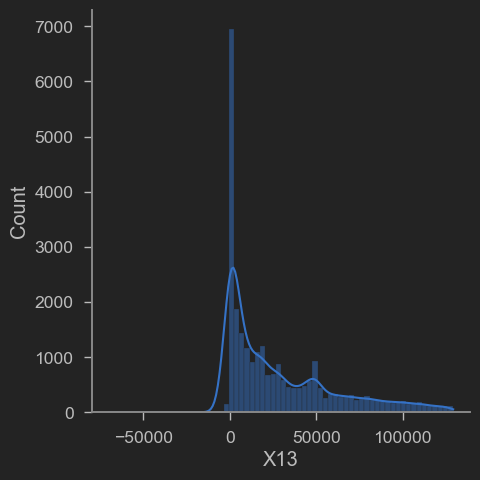

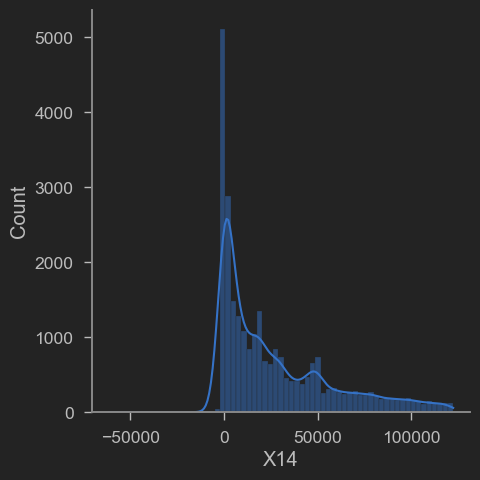

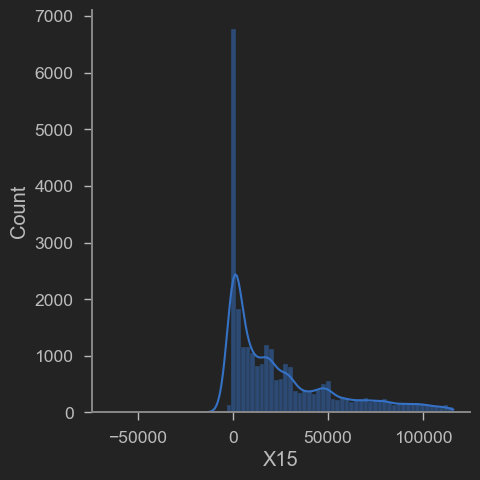

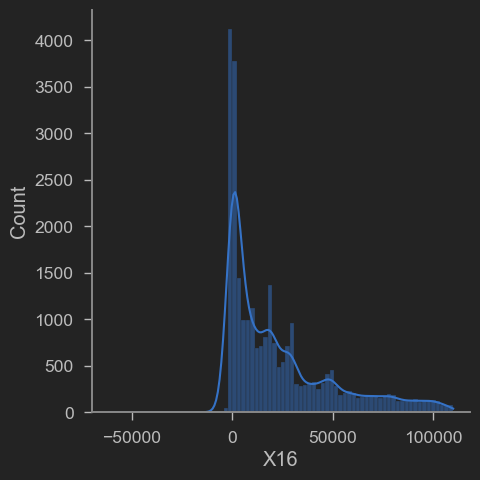

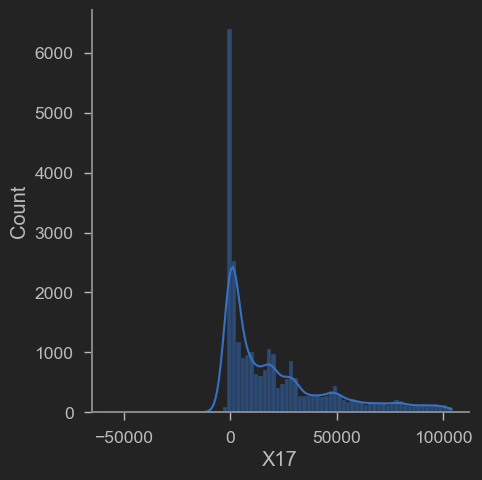

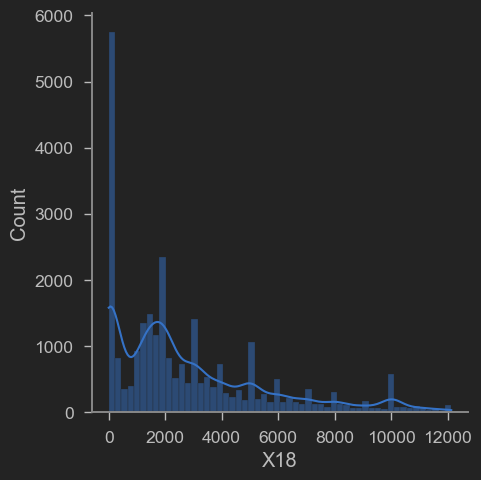

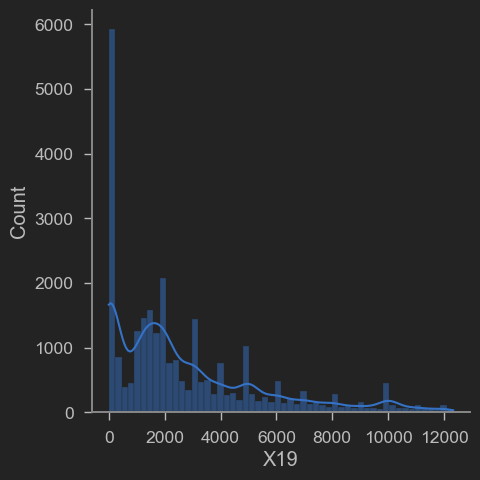

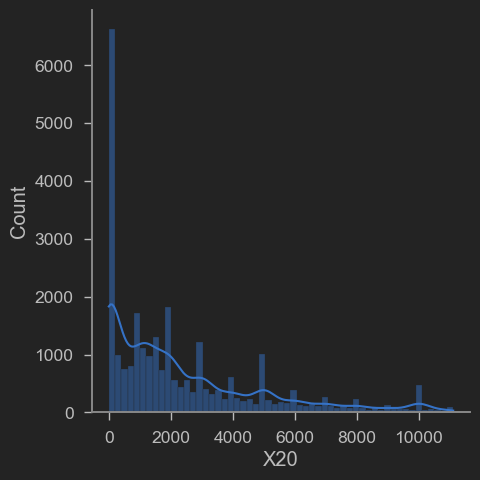

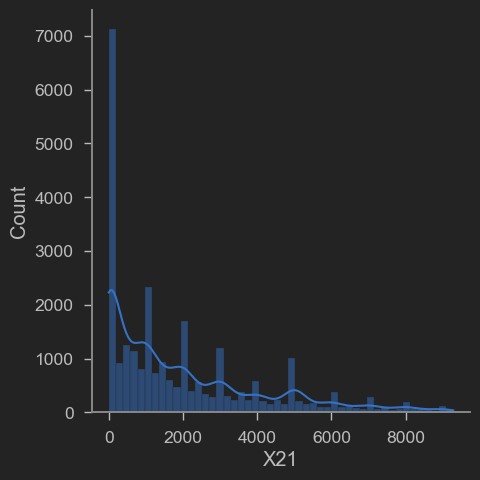

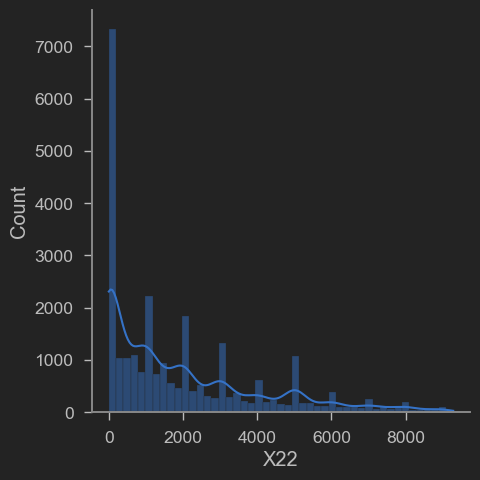

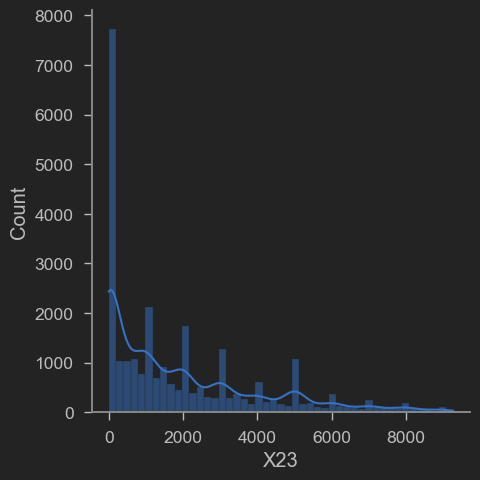

In [30]:
df_numerical_subset=df.select_dtypes(include='float64').columns.to_list()
for i in range(len(df_numerical_subset)):
    data = df[df_numerical_subset[i]]
    filtered = data[~is_outlier(data)]
    sns.displot(filtered, color='b', kde=True)

Podemos observar en los histogramas que en la mayoría de los casos no se cuenta con distribuciones normales, si analizamos a primera vista su asimetría y kurtosis, podemos ver en la mayoría de los casos una curtosis platicúrtica que puede ser debida por la gran dispersión que hay en los datos, de igual  manera, casos de asimetría positiva o negativa que podría ser por algún sesgo en los datos.

## Visualización, Interpretación y Explicación

### Boxplot

Debido a lo que comentamos en el caso de los histogramas que decidimos remover los 'outliers' para una mejor visualización de las distribuciones, en este caso vamos a corroborar la existencia de dichos 'outliers' mediante la graficación de los boxplots.

<AxesSubplot:>

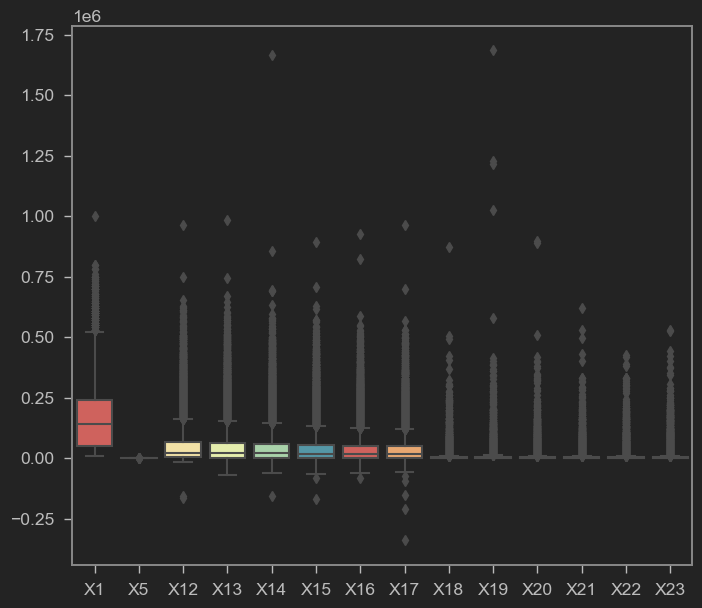

In [31]:
sns.boxplot(data=df, palette=sns.color_palette("Spectral"))

### Pair Plot

In [ ]:
sns.pairplot(df, hue='Y', vars=['X15', 'X16', 'X14', 'X13', 'X17'])

### Heatmap

In [ ]:
plt.figure(figsize = (30, 30)) 

sns.heatmap(df.corr(), annot=True)

## Conclusión